# Частотный анализ русского текста и построение облака слов

## Загрузка и отображение данных

In [1]:
pip install spacy

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
     ---------------------------------------- 0.0/87.7 kB ? eta -:--:--
     ------------------------------------- -- 81.9/87.7 kB 4.8 MB/s eta 0:00:01
     ---------------------------------------- 87.7/87.7 kB 1.6 MB/s eta 0:00:00
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
    --------------------------------------- 0.2/14.9 MB 6.9 MB/s eta 0:00:03
   - -------------------------------------- 0.5/14.9 MB 7.9 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/14.9 MB 8.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.9/14.9 MB 12.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.8/14.9 MB 13.6 MB/s eta 0:00:01
   --------- ------------------------------ 3.6/


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pymorphy2

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/55.5 kB ? eta -:--:--
   ---------------------------------------- 55.5/55.5 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
    --------------------------------------- 0.2/8.2 MB 4.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.2 MB 5.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/8.2 MB 5.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.2 MB 7.0 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/8.2 MB 7.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.2 MB 7.4 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.9 kB 656.4 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anmrt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anmrt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anmrt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
f = open('pushkin-metel.txt', "r", encoding="utf-8")
text = f.read()

In [6]:
type(text)

str

In [7]:
len(text)

22968

In [8]:
text[:300]

'Метель \n\n\nКони мчатся по буграм, \n\nТопчут снег глубокой \n\nВот, в сторонке божий храм \n\nВиден одинокой. \n\nВдруг метелица кругом; \n\nСнег валит клоками; \n\nЧерный вран, свистя крылом, \n\nВьется над санями; \n\nВещий стон гласит печаль! \n\nКони торопливы \n\nЧутко смотрят в темну даль, \n\nВоздымая гривы\n\n\xa0\xa0\xa0\xa0Жу'

## Предварительная обработка текста

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
type(string.punctuation)

str

In [11]:
# функция. почистить текст от спец. символов и пунктуации
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [12]:
# почистить текст
cleaned_text = remove_chars_from_text(text, string.punctuation + "«»—\"")
print(cleaned_text[:300])

Метель 


Кони мчатся по буграм 

Топчут снег глубокой 

Вот в сторонке божий храм 

Виден одинокой 

Вдруг метелица кругом 

Снег валит клоками 

Черный вран свистя крылом 

Вьется над санями 

Вещий стон гласит печаль 

Кони торопливы 

Чутко смотрят в темну даль 

Воздымая гривы

    Жуковский 




## Токенизация текста

In [13]:
from nltk import word_tokenize


In [21]:
tokens = word_tokenize(cleaned_text, language='russian')

In [36]:
# сколько токенов?
# вывести первые 10
print(len(tokens))
print(tokens[:10])

3457
['Метель', 'Кони', 'мчатся', 'по', 'буграм', 'Топчут', 'снег', 'глубокой', 'Вот', 'в']


In [24]:
from nltk import Text

# создать из токенов текст

text_obj = Text(tokens)
print(type(text_obj))

<class 'nltk.text.Text'>


## Расчёт растоты встречаемости слов

In [28]:
%%time
from nltk.probability import FreqDist
# Посчитайте частоту слов
fdist = FreqDist(tokens)
print(fdist)

<FreqDist with 1847 samples and 3457 outcomes>
CPU times: total: 0 ns
Wall time: 2.69 ms


In [30]:
# вывести самые часто встречаемые слова (первые 10)
for word, frequency in fdist.most_common(10):
    print(f"{word}: {frequency}")

и: 145
в: 96
не: 68
что: 50
с: 43
ее: 38
на: 28
она: 27
было: 27
он: 27


In [31]:
import matplotlib.pyplot as plt

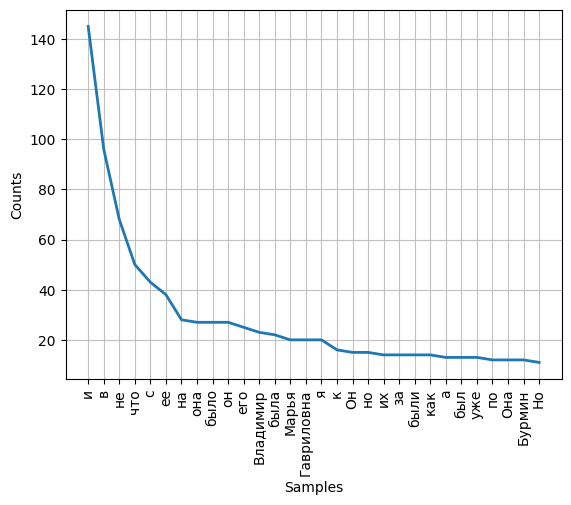

In [32]:
# вывести график встречаемости для первых 30 слов
fdist.plot(30, cumulative=False)
plt.show()

## Удаление стоп-слов

In [33]:
from nltk.corpus import stopwords


In [34]:
# сколько стоп слов?
russian_stopwords = stopwords.words("russian")
print(len(russian_stopwords))

151


In [39]:
#%%time
# удалить стоп-слова
filtered_tokens = [word for word in tokens if word.lower() not in russian_stopwords and len(word) > 2]

In [40]:
# сколько осталось токенов?
print(len(filtered_tokens))

2179


In [41]:
# создать из токенов текст
filtered_text = " ".join(filtered_tokens)

In [42]:
# вывести самые часто встречаемые слова в тектсе (первые 10)
fdist_filtered = FreqDist(filtered_tokens)
for word, frequency in fdist_filtered.most_common(10):
    print(f"{word}: {frequency}")

Владимир: 23
Марья: 20
Гавриловна: 20
Бурмин: 12
поехал: 9
поминутно: 8
Маша: 8
Владимира: 7
сани: 6
нею: 6


## Построение облака слов

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
text_raw = filtered_text

In [45]:
wordcloud = WordCloud().generate(text_raw)

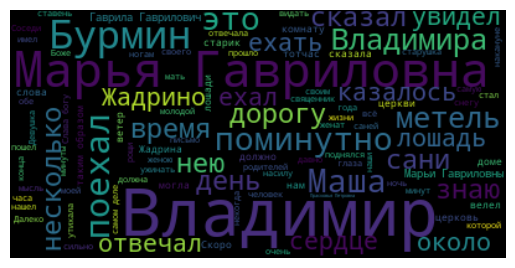

In [46]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Нарисовать диаграмму облака слов только для существительных, глаголов, прилагательных
использовать spacy или pymorphy2

In [47]:
import spacy

In [49]:
from spacy.lang.ru.examples import sentences 

In [54]:
!python -m spacy download ru_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.8.0/ru_core_news_sm-3.8.0-py3-none-any.whl (15.3 MB)
  Using cached pymorphy3-2.0.6-py3-none-any.whl.metadata (2.4 kB)
  Using cached dawg2_python-0.9.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl.metadata (2.0 kB)
Using cached pymorphy3-2.0.6-py3-none-any.whl (53 kB)
Using cached dawg2_python-0.9.0-py3-none-any.whl (9.3 kB)
Using cached pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl (8.4 MB)
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
nlp = spacy.load('ru_core_news_sm')

In [56]:
document = nlp("осень наступила")

In [57]:
document[0].lemma_, document[0].pos_, document[0].dep_, document[0].norm_

('осень', 'NOUN', 'nsubj', 'осень')

In [58]:
document[1].lemma_, document[1].pos_, document[1].dep_, document[1].norm_

('наступить', 'VERB', 'ROOT', 'наступила')

In [64]:
for i, sentence in enumerate(sentences[:3], 1):
    print(f"\n Предложение {i}")
    doc = nlp(sentence)
        
    print("Анализ токенов:")
    for token in doc:
        print(f"  '{token.text}': лемма='{token.lemma_}', POS='{token.pos_}', зависимость='{token.dep_}'")


 Предложение 1
Анализ токенов:
  'Apple': лемма='apple', POS='PROPN', зависимость='nsubj'
  'рассматривает': лемма='рассматривать', POS='VERB', зависимость='ROOT'
  'возможность': лемма='возможность', POS='NOUN', зависимость='obj'
  'покупки': лемма='покупка', POS='NOUN', зависимость='nmod'
  'стартапа': лемма='стартап', POS='NOUN', зависимость='nmod'
  'из': лемма='из', POS='ADP', зависимость='case'
  'Соединённого': лемма='соединённого', POS='ADJ', зависимость='amod'
  'Королевства': лемма='королевство', POS='PROPN', зависимость='nmod'
  'за': лемма='за', POS='ADP', зависимость='case'
  '$': лемма='$', POS='SYM', зависимость='nmod'
  '1': лемма='1', POS='NUM', зависимость='appos'
  'млрд': лемма='млрд', POS='NOUN', зависимость='punct'

 Предложение 2
Анализ токенов:
  'Беспилотные': лемма='беспилотный', POS='ADJ', зависимость='amod'
  'автомобили': лемма='автомобиль', POS='NOUN', зависимость='nsubj'
  'перекладывают': лемма='перекладывать', POS='VERB', зависимость='ROOT'
  'страхову

In [ ]:
#pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
#import pymorphy2
#morph = pymorphy2.MorphAnalyzer()
#print(morph.parse("метель"))

# Нарисовать диаграмму зависимостей слов для первых 5 предложений

In [ ]:
#from spacy import displacy

In [ ]:
#from IPython.display import display

In [ ]:

#doc = nlp("Это пример для первого предложения.")
#displacy.render(doc, style="dep", jupyter=True)

#не работает из-за проблем с библиотекой